# **DATA**





In [44]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from matplotlib.axis import Axis
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd


In [45]:
from google.colab import drive
import os

path = '/content/drive/My Drive/My_AI/RawData'

mylist = []
mylist = os.listdir(path)

#print(mylist)	



In [46]:
print(mylist[4000:])	
print(len(mylist))

['YAF_door_neutral.wav', 'YAF_door_ps.wav', 'YAF_dog_disgust.wav', 'YAF_dodge_happy.wav', 'YAF_door_disgust.wav', 'YAF_dog_sad.wav', 'YAF_dog_fear.wav', 'YAF_dog_ps.wav', 'YAF_fit_happy.wav', 'YAF_fat_fear.wav', 'YAF_fit_angry.wav', 'YAF_five_disgust.wav', 'YAF_fit_neutral.wav', 'YAF_fall_happy.wav', 'YAF_five_angry.wav', 'YAF_fit_ps.wav', 'YAF_far_happy.wav', 'YAF_fit_fear.wav', 'YAF_fail_ps.wav', 'YAF_far_fear.wav', 'YAF_fat_disgust.wav', 'YAF_five_fear.wav', 'YAF_fat_ps.wav', 'YAF_far_sad.wav', 'YAF_far_ps.wav', 'YAF_far_disgust.wav', 'YAF_fat_sad.wav', 'YAF_fall_ps.wav', 'YAF_far_angry.wav', 'YAF_fat_angry.wav', 'YAF_fall_sad.wav', 'YAF_far_neutral.wav', 'YAF_five_happy.wav', 'YAF_fat_happy.wav', 'YAF_fall_neutral.wav', 'YAF_fall_angry.wav', 'YAF_fail_sad.wav', 'YAF_fit_sad.wav', 'YAF_fall_fear.wav', 'YAF_fall_disgust.wav', 'YAF_fat_neutral.wav', 'YAF_fit_disgust.wav', 'YAF_good_neutral.wav', 'YAF_goal_angry.wav', 'YAF_five_neutral.wav', 'YAF_goose_sad.wav', 'YAF_goal_fear.wav', 'Y

# LABLES & FEATURES

In [47]:
import re

feeling_list=[]
dataset = ''
count = 0
for item in mylist:
    file_label = item[6:-16]
    try:
      file_label = int(file_label)
      dataset = 'RAVDESS'
    except:
      if (item[:1] == 'Y') or (item[:1] == 'O'):
        file_label = re.split('_|\.', item)[2]
        dataset = 'TESS'
      else: 
        try:
          item = item[:-4]
          int(item[-3:])  
          dataset = 'SER_v4'
        except:
          dataset = 'SAVEE'

    if dataset == 'RAVDESS':
      if int(item[18:-4])%2==0:  #female
          if file_label == 1:
            feeling_list.append('female_neutral')
          elif file_label == 2:
            feeling_list.append('female_calm')
          elif file_label == 3:
            feeling_list.append('female_joy')
          elif file_label == 4:
            feeling_list.append('female_sadness')
          elif file_label == 5:
            feeling_list.append('female_anger')
          elif file_label == 6:
            feeling_list.append('female_fear')
          elif file_label == 7:
            feeling_list.append('female_disgust')
          elif file_label == 8:
            feeling_list.append('female_surprise')
      else:
          if file_label== 1:
            feeling_list.append('male_neutral')
          elif file_label == 2:
            feeling_list.append('male_calm')
          elif file_label == 3:
            feeling_list.append('male_joy')
          elif file_label == 4:
            feeling_list.append('male_sadness')
          elif file_label == 5:
            feeling_list.append('male_anger')
          elif file_label == 6:
            feeling_list.append('male_fear')
          elif file_label == 7:
            feeling_list.append('male_disgust')
          elif file_label == 8:
            feeling_list.append('male_surprise')

    elif dataset == 'TESS':
      if file_label == 'neutral': feeling_list.append('female_neutral')
      elif file_label == 'angry': feeling_list.append('female_anger')
      elif file_label == 'disgust': feeling_list.append('female_disgust')
      elif file_label == 'ps': feeling_list.append('female_surprise')
      elif file_label == 'happy': feeling_list.append('female_joy')
      elif file_label == 'sad': feeling_list.append('female_sadness')
      elif file_label == 'fear': feeling_list.append('female_fear')

    elif dataset == 'SER_v4':
      if int(item[-3:])%2 == 1: # male
        file_label = item[:-3]
        if file_label == 'neutral': feeling_list.append('male_neutral')
        elif file_label == 'anger': feeling_list.append('male_anger')
        elif file_label == 'disgust': feeling_list.append('male_disgust')
        elif file_label == 'surprise': feeling_list.append('male_surprise')
        elif file_label == 'happy': feeling_list.append('male_joy')
        elif file_label == 'sad': feeling_list.append('male_sadness')
        elif file_label == 'fear': feeling_list.append('male_fear')
      else:
        file_label = item[:-3]
        if file_label == 'neutral': feeling_list.append('female_neutral')
        elif file_label == 'anger': feeling_list.append('female_anger')
        elif file_label == 'disgust': feeling_list.append('female_disgust')
        elif file_label == 'surprise': feeling_list.append('female_surprise')
        elif file_label == 'happy': feeling_list.append('female_joy')
        elif file_label == 'sad': feeling_list.append('female_sadness')
        elif file_label == 'fear': feeling_list.append('female_fear')
      
    elif dataset == 'SAVEE':
      if item[:1]=='a':
        feeling_list.append('male_anger')
      elif item[:1]=='f':
        feeling_list.append('male_fear')
      elif item[:1]=='h':
        feeling_list.append('male_joy')
      elif item[:1]=='n':
        feeling_list.append('male_neutral')
      elif item[:2]=='sa':
        feeling_list.append('male_sadness')
      elif item[:2]=='su':
        feeling_list.append('male_surprise')
      elif item[:1]=='d':
        feeling_list.append('male_disgust')


In [48]:
import pandas as pd

labels = pd.DataFrame(feeling_list)
labels #[2600:2700]    

,0
0,male_sadness
1,male_sadness
2,male_sadness
3,female_sadness
4,male_sadness
...,...
7193,male_fear
7194,male_anger
7195,female_calm
7196,female_sadness


Getting the features of audio files using librosa

In [49]:
import librosa
import numpy as np

def reshape_feature(arr):   # reshapes to 10 values per feature
  shape_arr = arr.shape[0]
  r = shape_arr%10
  arr = arr[:(len(arr)-r)]
  d = int(shape_arr/10)
  arr = np.mean(arr.reshape(-1, d), axis=1) 
  return arr


def extract_feature(my_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    rolloff = kwargs.get("rolloff")
    centroids = kwargs.get("centroids")
    rms = kwargs.get("rms")

    X, sample_rate = librosa.core.load(my_file)

    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))  # (n=40,t) -> 40 values 
    if rms:    
        rms = np.mean(librosa.feature.rms(X),axis=0)
        rms = reshape_feature(rms)      # (1,t) - > 10 values (avg)
        result = np.hstack((result, rms))        
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))  # (128,t) -> 128 values   
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz)) # (6,t) -> 6 values     
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, n_chroma = 14, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))  # (n=14,t) -> 14 values                      
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, contrast))  # (7,t) -> 7 values
    if rolloff:    
        rolloff = np.mean(librosa.feature.spectral_rolloff(X+0.01, sr=sample_rate),axis=0)
        rolloff = reshape_feature(rolloff)    # (1,t) - > 10 values (avg)
        result = np.hstack((result, rolloff)) 
    if centroids:    
        centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate),axis=0)
        centroids = reshape_feature(centroids)  # (1,t) - > 10 values (avg)
        result = np.hstack((result, centroids)) 
    
    return result

f = os.fspath('/content/drive/MyDrive/My_AI/RawData/03-01-04-01-02-02-01.wav')
a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
print(a, a.shape)

[-7.11961003e+02  5.99244220e+01  3.83191624e-01  1.59403587e+01
  5.67376873e+00  1.53520325e-01  8.92264981e-01 -7.20391033e+00
 -1.25652569e+01 -3.65540606e+00 -2.70926383e+00 -2.14541840e+00
 -3.53642246e-01 -3.74469973e+00 -2.85052446e+00  2.17255873e+00
 -3.43898484e+00 -3.96823721e+00 -1.86626015e+00  1.59572384e-01
 -6.75410126e+00 -1.73930453e+00 -2.20268345e+00 -3.39606991e+00
 -2.21927322e+00 -4.38045381e-01 -4.57583535e+00 -2.13146993e+00
 -2.53880351e+00  1.23917245e-01 -1.93521483e+00 -1.47470094e+00
 -2.17954576e+00 -2.38947182e+00 -4.25227102e+00 -1.58187930e+00
 -2.25012442e+00 -1.58634903e+00 -2.81825429e+00 -2.49687436e+00
  4.40952726e-06  1.31456466e-06  2.27152050e-05  7.13768462e-03
  5.94100310e-03  6.31744554e-03  3.85051640e-03  6.29960035e-04
  8.80118478e-06  1.85505723e-06  2.49405864e-06  5.83407869e-05
  3.31626983e-03  2.22720150e-02  2.82310750e-02  8.91589472e-03
  4.50106735e-03  2.20895065e-02  2.94586335e-02  2.15100226e-02
  9.77406720e-03  1.24280

EXTRACT FEATURES FROM THE FILES IN THE DATASETS

In [51]:
data_frame = pd.DataFrame(columns=['all_features'])
bookmark=0

for index,y in enumerate(mylist):
      all_features_ndarray = extract_feature('/content/drive/My Drive/My_AI/RawData/'+ y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
      data_frame.loc[bookmark] = [all_features_ndarray]
      bookmark=bookmark+1
      if bookmark%100==0: print(bookmark)

print(data_frame.shape)
        

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
(7198, 1)


In [52]:
data_frame

,all_features
0,"[-677.0126067213283, 68.12888721970869, 1.2261..."
1,"[-557.0776311573632, 37.73133971497115, -25.69..."
2,"[-651.3068149027393, 28.174296589333228, -22.3..."
3,"[-598.479799297571, 83.87693278618099, -4.3676..."
4,"[-620.5454399369338, 63.076147215657386, -4.55..."
...,...
7193,"[-714.1079051201358, 61.88775583094703, 7.4510..."
7194,"[-581.1174602895977, 68.77734003400334, -0.720..."
7195,"[-727.8029769587318, 47.48866941475508, -3.987..."
7196,"[-714.3190524203625, 49.878237640280844, -4.65..."


In [53]:
print(pd.DataFrame(data_frame['all_features']).shape)

(7198, 1)


In [54]:
data_frame = pd.DataFrame(data_frame['all_features'].values.tolist())
data_frame[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224
0,-677.012607,68.128887,1.226144,13.246095,1.681556,0.729557,-13.641576,-3.576321,-8.595147,-4.046197,4.691763,-6.023820,1.683967,-0.069172,-5.879847,0.592705,-6.601959,-6.193829,0.361195,-2.431681,-6.519171,-0.058899,-5.800941,-3.980719,-2.219832,-0.920634,-2.284002,-1.727077,-1.160240,-1.174291,-2.115416,0.928084,1.233274,5.737881,-0.308995,2.263868,0.248554,6.760577,9.820166,17.682036,...,0.563259,0.491308,0.583315,0.633197,0.679227,0.749516,0.582634,0.494202,0.531570,0.512122,0.458497,0.463920,0.566851,23.916075,17.319184,20.345724,18.528481,18.319662,17.714452,30.448045,10.766602,10.766602,2483.118318,3031.648335,2326.719264,1352.058491,1034.160413,592.163086,10.766602,10.766602,4141.946889,3960.300525,3169.100261,2211.468405,1750.150643,1249.341416,1107.307061,874.524551,3054.225012,3151.287050
1,-557.077631,37.731340,-25.690923,2.721265,-8.469222,-16.783412,-11.141711,-16.858932,-20.300446,1.526086,-9.046842,-4.551558,-5.803873,-6.084743,0.324458,-1.555424,-1.621261,13.536664,13.608310,16.614511,16.819150,12.947100,1.430434,4.995464,-5.904416,3.786624,2.862549,2.213109,-3.014830,-2.941496,0.153834,5.607506,1.279606,-2.695713,-3.278017,1.666410,3.034963,-0.849230,3.336941,10.858757,...,0.491847,0.444110,0.454247,0.493769,0.492756,0.661281,0.718564,0.530350,0.553521,0.602293,0.517585,0.451096,0.424385,19.880041,22.838296,21.529882,20.549496,20.496978,20.783570,32.063672,10.766602,99.462891,4120.532227,4847.534180,3142.309570,2521.435547,3741.650391,1993.359375,87.158203,10.766602,4724.091019,3319.011026,2992.454686,3003.583954,1871.331079,1582.119839,2224.851651,1357.369560,3383.279798,4125.006267
2,-651.306815,28.174297,-22.387151,-3.099898,-21.895704,-20.684444,-6.937055,-22.691892,-16.077010,-2.648343,-13.845468,-4.334402,-9.532113,-4.433517,-8.319336,-6.686531,5.342289,12.560371,14.379339,23.704241,15.249805,10.304655,-0.133664,1.355806,-6.263078,1.910011,-2.980607,-1.288093,-8.861574,-4.063428,-4.258260,2.463083,-3.307999,-5.789722,-2.006577,1.961835,-0.318634,0.151110,3.371160,9.975064,...,0.329323,0.309499,0.281291,0.325560,0.367705,0.500406,0.605766,0.484343,0.392134,0.408733,0.364195,0.290005,0.278199,16.241609,27.394842,23.728332,21.416993,20.492162,20.763445,30.739935,10.766602,746.810636,4213.656339,3384.628018,2375.014426,4060.476962,1512.218129,1479.428933,108.644798,10.766602,1005.430834,1924.243185,2937.317570,2505.250228,1780.086072,2723.276573,1538.029538,1392.617717,3731.779374,4747.144549
3,-598.479799,83.876933,-4.367654,17.879762,1.207946,-22.144229,-9.396517,-0.343920,-17.230260,2.128921,-0.053539,-7.968760,-5.630409,0.340969,-4.279300,-0.842008,-4.132873,-3.515869,-1.105263,-3.192063,-7.741529,-2.782670,-8.780764,-1.375007,-4.971819,1.227432,-5.522446,-0.596580,-2.901904,-2.884426,-0.602703,-0.587759,0.122286,2.224288,3.667640,1.273863,-0.666005,2.981427,6.911973,14.680708,...,0.532198,0.434175,0.455267,0.475820,0.525077,0.628532,0.578828,0.479653,0.514261,0.543563,0.464444,0.399926,0.475848,25.398912,18.158348,19.869336,20.598790,18.313720,20.464000,30.941011,10.766602,657.698922,3549.233611,2963.155995,2875.150730,1704.867952,2240.389351,805.622665,501.817255,10.766602,3090.152980,2984.077314,2357.822539,1973.434529,1943.695531,1239.052240,1601.832606,852.554178,1158.985943,2473.661473
4,-620.545440,63.076147,-4.554053,12.682791,0.132151,1.816087,-10.988464,-12.289517,-18.790218,-3.880212,-2.682088,-8.190950,-5.754832,-9.954274,-0.609016,2.046038,-12.034189,-4.354440,-3.916669,-7.596240,-10.865715,-2.858283,-8.838741,-8.424173,-3.157844,-6.277223,-5.993330,-3.999957,-6.670746,-3.156587,-4.428938,-0.825791,0.930508,-1.368441,-1.244825,0.040529,0.498666,3.362422,8.152221,14.178395,...,0.534658,0.466229,0.507336,0.567961,0.628232

In [55]:
data_frame_labels = pd.concat([data_frame,labels], axis=1)
data_frame_labels = data_frame_labels.rename(index=str, columns={"0": "label"})
data_frame_labels    #print

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,0
0,-677.012607,68.128887,1.226144,13.246095,1.681556,0.729557,-13.641576,-3.576321,-8.595147,-4.046197,4.691763,-6.023820,1.683967,-0.069172,-5.879847,0.592705,-6.601959,-6.193829,0.361195,-2.431681,-6.519171,-0.058899,-5.800941,-3.980719,-2.219832,-0.920634,-2.284002,-1.727077,-1.160240,-1.174291,-2.115416,0.928084,1.233274,5.737881,-0.308995,2.263868,0.248554,6.760577,9.820166,17.682036,...,0.491308,0.583315,0.633197,0.679227,0.749516,0.582634,0.494202,0.531570,0.512122,0.458497,0.463920,0.566851,23.916075,17.319184,20.345724,18.528481,18.319662,17.714452,30.448045,10.766602,10.766602,2483.118318,3031.648335,2326.719264,1352.058491,1034.160413,592.163086,10.766602,10.766602,4141.946889,3960.300525,3169.100261,2211.468405,1750.150643,1249.341416,1107.307061,874.524551,3054.225012,3151.287050,male_sadness
1,-557.077631,37.731340,-25.690923,2.721265,-8.469222,-16.783412,-11.141711,-16.858932,-20.300446,1.526086,-9.046842,-4.551558,-5.803873,-6.084743,0.324458,-1.555424,-1.621261,13.536664,13.608310,16.614511,16.819150,12.947100,1.430434,4.995464,-5.904416,3.786624,2.862549,2.213109,-3.014830,-2.941496,0.153834,5.607506,1.279606,-2.695713,-3.278017,1.666410,3.034963,-0.849230,3.336941,10.858757,...,0.444110,0.454247,0.493769,0.492756,0.661281,0.718564,0.530350,0.553521,0.602293,0.517585,0.451096,0.424385,19.880041,22.838296,21.529882,20.549496,20.496978,20.783570,32.063672,10.766602,99.462891,4120.532227,4847.534180,3142.309570,2521.435547,3741.650391,1993.359375,87.158203,10.766602,4724.091019,3319.011026,2992.454686,3003.583954,1871.331079,1582.119839,2224.851651,1357.369560,3383.279798,4125.006267,male_sadness
2,-651.306815,28.174297,-22.387151,-3.099898,-21.895704,-20.684444,-6.937055,-22.691892,-16.077010,-2.648343,-13.845468,-4.334402,-9.532113,-4.433517,-8.319336,-6.686531,5.342289,12.560371,14.379339,23.704241,15.249805,10.304655,-0.133664,1.355806,-6.263078,1.910011,-2.980607,-1.288093,-8.861574,-4.063428,-4.258260,2.463083,-3.307999,-5.789722,-2.006577,1.961835,-0.318634,0.151110,3.371160,9.975064,...,0.309499,0.281291,0.325560,0.367705,0.500406,0.605766,0.484343,0.392134,0.408733,0.364195,0.290005,0.278199,16.241609,27.394842,23.728332,21.416993,20.492162,20.763445,30.739935,10.766602,746.810636,4213.656339,3384.628018,2375.014426,4060.476962,1512.218129,1479.428933,108.644798,10.766602,1005.430834,1924.243185,2937.317570,2505.250228,1780.086072,2723.276573,1538.029538,1392.617717,3731.779374,4747.144549,male_sadness
3,-598.479799,83.876933,-4.367654,17.879762,1.207946,-22.144229,-9.396517,-0.343920,-17.230260,2.128921,-0.053539,-7.968760,-5.630409,0.340969,-4.279300,-0.842008,-4.132873,-3.515869,-1.105263,-3.192063,-7.741529,-2.782670,-8.780764,-1.375007,-4.971819,1.227432,-5.522446,-0.596580,-2.901904,-2.884426,-0.602703,-0.587759,0.122286,2.224288,3.667640,1.273863,-0.666005,2.981427,6.911973,14.680708,...,0.434175,0.455267,0.475820,0.525077,0.628532,0.578828,0.479653,0.514261,0.543563,0.464444,0.399926,0.475848,25.398912,18.158348,19.869336,20.598790,18.313720,20.464000,30.941011,10.766602,657.698922,3549.233611,2963.155995,2875.150730,1704.867952,2240.389351,805.622665,501.817255,10.766602,3090.152980,2984.077314,2357.822539,1973.434529,1943.695531,1239.052240,1601.832606,852.554178,1158.985943,2473.661473,female_sadness
4,-620.545440,63.076147,-4.554053,12.682791,0.132151,1.816087,-10.988464,-12.289517,-18.790218,-3.880212,-2.682088,-8.190950,-5.754832,-9.954274,-0.609016,2.046038,-12.034189,-4.354440,-3.916669,-7.596240,-10.865715,-2.858283,-8.838741,-8.424173,-3.157844,-6.277223,-5.993330,-3.999957,-6.670746,-3.156587,-4.428938,-0.825791,0.930508,-1.368441,-1.244825,0.040529,0.498666,3.362422,8.152221,14.178395,...,0.466229,0.507336,0.567961,0

# SAVE DATASET FEATURES AND LABELS 

In [56]:
import pickle

with open('/content/drive/My Drive/My_AI/datasets_RAVDESS-TESS-SAVEE-SER_v4_features&labels_8features_order.pkl', 'wb') as f:
  pickle.dump(data_frame_labels, f)


# LOAD DATASET FEATURES AND LABELS 

In [57]:
import pickle

with open('/content/drive/My Drive/My_AI/datasets_RAVDESS-TESS-SAVEE-SER_v4_features&labels_8features_order.pkl', 'rb') as f:
  data_frame_labels = pickle.load(f)

In [58]:
data_frame_labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,0
0,-677.012607,68.128887,1.226144,13.246095,1.681556,0.729557,-13.641576,-3.576321,-8.595147,-4.046197,4.691763,-6.023820,1.683967,-0.069172,-5.879847,0.592705,-6.601959,-6.193829,0.361195,-2.431681,-6.519171,-0.058899,-5.800941,-3.980719,-2.219832,-0.920634,-2.284002,-1.727077,-1.160240,-1.174291,-2.115416,0.928084,1.233274,5.737881,-0.308995,2.263868,0.248554,6.760577,9.820166,17.682036,...,0.491308,0.583315,0.633197,0.679227,0.749516,0.582634,0.494202,0.531570,0.512122,0.458497,0.463920,0.566851,23.916075,17.319184,20.345724,18.528481,18.319662,17.714452,30.448045,10.766602,10.766602,2483.118318,3031.648335,2326.719264,1352.058491,1034.160413,592.163086,10.766602,10.766602,4141.946889,3960.300525,3169.100261,2211.468405,1750.150643,1249.341416,1107.307061,874.524551,3054.225012,3151.287050,male_sadness
1,-557.077631,37.731340,-25.690923,2.721265,-8.469222,-16.783412,-11.141711,-16.858932,-20.300446,1.526086,-9.046842,-4.551558,-5.803873,-6.084743,0.324458,-1.555424,-1.621261,13.536664,13.608310,16.614511,16.819150,12.947100,1.430434,4.995464,-5.904416,3.786624,2.862549,2.213109,-3.014830,-2.941496,0.153834,5.607506,1.279606,-2.695713,-3.278017,1.666410,3.034963,-0.849230,3.336941,10.858757,...,0.444110,0.454247,0.493769,0.492756,0.661281,0.718564,0.530350,0.553521,0.602293,0.517585,0.451096,0.424385,19.880041,22.838296,21.529882,20.549496,20.496978,20.783570,32.063672,10.766602,99.462891,4120.532227,4847.534180,3142.309570,2521.435547,3741.650391,1993.359375,87.158203,10.766602,4724.091019,3319.011026,2992.454686,3003.583954,1871.331079,1582.119839,2224.851651,1357.369560,3383.279798,4125.006267,male_sadness
2,-651.306815,28.174297,-22.387151,-3.099898,-21.895704,-20.684444,-6.937055,-22.691892,-16.077010,-2.648343,-13.845468,-4.334402,-9.532113,-4.433517,-8.319336,-6.686531,5.342289,12.560371,14.379339,23.704241,15.249805,10.304655,-0.133664,1.355806,-6.263078,1.910011,-2.980607,-1.288093,-8.861574,-4.063428,-4.258260,2.463083,-3.307999,-5.789722,-2.006577,1.961835,-0.318634,0.151110,3.371160,9.975064,...,0.309499,0.281291,0.325560,0.367705,0.500406,0.605766,0.484343,0.392134,0.408733,0.364195,0.290005,0.278199,16.241609,27.394842,23.728332,21.416993,20.492162,20.763445,30.739935,10.766602,746.810636,4213.656339,3384.628018,2375.014426,4060.476962,1512.218129,1479.428933,108.644798,10.766602,1005.430834,1924.243185,2937.317570,2505.250228,1780.086072,2723.276573,1538.029538,1392.617717,3731.779374,4747.144549,male_sadness
3,-598.479799,83.876933,-4.367654,17.879762,1.207946,-22.144229,-9.396517,-0.343920,-17.230260,2.128921,-0.053539,-7.968760,-5.630409,0.340969,-4.279300,-0.842008,-4.132873,-3.515869,-1.105263,-3.192063,-7.741529,-2.782670,-8.780764,-1.375007,-4.971819,1.227432,-5.522446,-0.596580,-2.901904,-2.884426,-0.602703,-0.587759,0.122286,2.224288,3.667640,1.273863,-0.666005,2.981427,6.911973,14.680708,...,0.434175,0.455267,0.475820,0.525077,0.628532,0.578828,0.479653,0.514261,0.543563,0.464444,0.399926,0.475848,25.398912,18.158348,19.869336,20.598790,18.313720,20.464000,30.941011,10.766602,657.698922,3549.233611,2963.155995,2875.150730,1704.867952,2240.389351,805.622665,501.817255,10.766602,3090.152980,2984.077314,2357.822539,1973.434529,1943.695531,1239.052240,1601.832606,852.554178,1158.985943,2473.661473,female_sadness
4,-620.545440,63.076147,-4.554053,12.682791,0.132151,1.816087,-10.988464,-12.289517,-18.790218,-3.880212,-2.682088,-8.190950,-5.754832,-9.954274,-0.609016,2.046038,-12.034189,-4.354440,-3.916669,-7.596240,-10.865715,-2.858283,-8.838741,-8.424173,-3.157844,-6.277223,-5.993330,-3.999957,-6.670746,-3.156587,-4.428938,-0.825791,0.930508,-1.368441,-1.244825,0.040529,0.498666,3.362422,8.152221,14.178395,...,0.466229,0.507336,0.567961,0

## **SCALING - NORMALIZATION**

In [59]:
data_array = data_frame_labels.iloc[:,:(data_frame_labels.shape[1]-1)].to_numpy()
print(data_array)

[[-6.77012607e+02  6.81288872e+01  1.22614371e+00 ...  8.74524551e+02
   3.05422501e+03  3.15128705e+03]
 [-5.57077631e+02  3.77313397e+01 -2.56909235e+01 ...  1.35736956e+03
   3.38327980e+03  4.12500627e+03]
 [-6.51306815e+02  2.81742966e+01 -2.23871507e+01 ...  1.39261772e+03
   3.73177937e+03  4.74714455e+03]
 ...
 [-7.27802977e+02  4.74886694e+01 -3.98731302e+00 ...  2.38049026e+03
   2.63404561e+03  2.85345574e+03]
 [-7.14319052e+02  4.98782376e+01 -4.65872935e+00 ...  2.23603802e+03
   3.70609337e+03  4.22994355e+03]
 [-6.14432442e+02  6.15239027e+01 -4.08322423e+01 ...  1.84150037e+03
   3.10176721e+03  3.25515239e+03]]


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_array)
data_array = scaler.transform(data_array)
print(data_array)

[[-1.61195589  0.24791527  0.03951791 ... -1.00216719  0.6323222
   0.29952779]
 [-0.62056034 -0.82041443 -1.51858443 ... -0.52543437  0.92231826
   0.93473438]
 [-1.39946902 -1.15629919 -1.32734457 ... -0.49063241  1.22945102
   1.34058683]
 ...
 [-2.03179462 -0.47749055 -0.26226456 ...  0.48473495  0.262018
   0.10523728]
 [-1.92033503 -0.39350855 -0.30112969 ...  0.34211128  1.20681394
   1.00319031]
 [-1.09466144  0.01578137 -2.39504412 ... -0.04743203  0.67422116
   0.36728444]]


REPLACING OLD VALUES WITH THE NORMALIZED ONES

In [61]:
for w in range(0,data_array.shape[0]):
  data_frame_labels.iloc[w,:data_array.shape[1]] = data_array[w]
  
print(data_frame_labels.shape)

(7198, 226)


In [62]:
data_frame_labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,0
0,-1.611956,0.247915,0.039518,0.084754,0.251604,0.441362,-0.765329,0.613241,0.030788,-0.384460,1.849337,-0.827682,1.190005,-0.213669,-0.897839,0.355731,-1.211129,-1.571266,0.485896,-0.539929,-0.982207,-0.260358,-0.949480,-0.964114,-0.229866,-0.686457,-0.443622,-1.089343,-0.236604,-0.897302,-0.643767,-0.665485,0.025006,0.526101,-0.465302,-0.353023,-0.422400,0.339245,1.295892,2.643080,...,-0.510210,0.385679,0.789562,1.186394,1.603846,0.338132,-0.380372,-0.055858,-0.212919,-0.650013,-0.597878,0.210031,0.396492,-0.318550,0.019199,0.074029,-0.401169,-0.730842,-0.386341,-0.799905,-0.990166,-0.285183,-0.445498,-0.418872,-0.799881,-0.991204,-0.899623,-0.885331,-0.669468,0.112791,0.413309,0.448976,-0.046448,-0.254130,-0.488675,-0.713949,-1.002167,0.632322,0.299528,male_sadness
1,-0.620560,-0.820414,-1.518584,-0.642449,-0.684949,-1.743950,-0.406576,-1.292609,-1.810972,0.675166,-0.333488,-0.586100,-0.445526,-1.519185,0.373139,-0.191600,0.121732,2.367652,3.320426,2.708554,3.036650,2.279340,0.615941,0.454729,-0.805351,0.100245,0.605619,-0.214298,-0.678669,-1.301056,-0.075711,0.483788,0.036553,-1.152073,-0.970253,-0.445272,-0.017017,-0.815281,0.137940,1.298585,...,-0.929132,-0.690720,-0.278610,-0.233903,0.935041,1.472649,-0.086745,0.119814,0.510144,-0.173656,-0.701654,-0.983369,-0.356502,1.078404,0.376520,0.905777,0.562927,0.748553,0.045608,-0.799905,-0.961050,0.684461,0.708402,-0.005351,0.138329,0.727909,-0.119892,-0.844043,-0.669468,0.356606,-0.023744,0.289607,0.789462,-0.155737,0.038098,0.458566,-0.525434,0.922318,0.934734,male_sadness
2,-1.399469,-1.156299,-1.327345,-1.044657,-1.923732,-2.230730,0.196829,-2.129549,-1.146439,-0.118644,-1.095906,-0.550467,-1.259866,-1.160831,-1.397578,-1.498976,1.985215,2.172748,3.485406,3.917765,2.766409,1.763346,0.277351,-0.120583,-0.861369,-0.213385,-0.585641,-0.991852,-2.072317,-1.557385,-1.180180,-0.288487,-1.106799,-1.767740,-0.754015,-0.399657,-0.504918,-0.663514,0.144052,1.124458,...,-2.123913,-2.133145,-1.567276,-1.186377,-0.284364,0.531197,-0.460457,-1.171739,-1.041970,-1.410257,-2.005220,-2.207926,-1.035317,2.231720,1.039904,1.262795,0.560794,0.738853,-0.308303,-0.799905,-0.748549,0.739607,-0.221198,-0.394385,1.373126,-0.687663,-0.405882,-0.832430,-0.669468,-1.200847,-0.974310,0.239862,0.263576,-0.229824,1.844500,-0.262040,-0.490632,1.229451,1.340587,male_sadness
3,-0.962795,0.801384,-0.284281,0.404912,0.207907,-2.412886,-0.156126,1.077041,-1.327896,0.789801,1.095391,-1.146826,-0.407637,-0.124659,-0.569960,-0.009826,-0.550389,-1.036649,0.172113,-0.669619,-1.192697,-0.792232,-1.594540,-0.552236,-0.659691,-0.327461,-1.103853,-0.838280,-0.651752,-1.288017,-0.265093,-1.037778,-0.251882,-0.173058,0.211019,-0.505882,-0.555455,-0.234111,0.776467,2.051683,...,-1.017316,-0.682210,-0.416115,0.012277,0.686810,0.306369,-0.498556,-0.194374,0.039204,-0.602073,-1.115728,-0.552279,0.673142,-0.106148,-0.124552,0.926064,-0.403800,0.594512,-0.254543,-0.799905,-0.777801,0.346149,-0.489021,-0.140806,-0.516816,-0.225312,-0.780838,-0.619932,-0.669468,-0.327722,-0.252009,-0.282957,-0.297642,-0.096981,-0.504963,-0.195099,-1.023859,-1.037952,-0.142522,female_sadness
4,-1.145192,0.070335,-0.295070,0.045833,0.108649,0.576942,-0.384584,-0.636968,-1.573346,-0.352897,0.677761,-1.183285,-0.434814,-2.358962,0.181913,0.726031,-2.664823,-1.204058,-0.429452,-1.420787,-1.730681,-0.806997,-1.607091,-1.666480,-0.376371,-1.581679,-1.199853,-1.594109,-1.550105,-1.350198,-1.222905,-1.096239,-0.050452,-0.887964,-0.624461,-0.696312,-0.386012,-0.176308,0.997984,1.952704,...,-0.732812,-0.247965,0.289780,0.797978,1.241185,0.495879,-0.452893,-0.188548,-0.116247,-0.639319,-0.637897,0.077567,0.287043,0.083887,0.428988,0.022217,-0.456033,-0.721552,-0.180281,-0.799905,-0.990166

# **SAVE NORMALIZED DATAFRAME**

In [63]:
import pickle

with open('/content/drive/My Drive/My_AI/datasets_RAVDESS-TESS-SAVEE-SER_v4_features&labels_8features_normalized_order.pkl', 'wb') as f:
  pickle.dump(data_frame_labels, f)

# **LOAD NORMALIZED DATAFRAME**

In [64]:
import pickle

with open('/content/drive/My Drive/My_AI/datasets_RAVDESS-TESS-SAVEE-SER_v4_features&labels_8features_normalized_order.pkl', 'rb') as f:
  data_frame_labels = pickle.load(f)

SHUFFLE DATAFRAME

In [65]:
from sklearn.utils import shuffle

data_frame_labels = shuffle(data_frame_labels)
data_frame_labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,0
2530,-1.959099,-0.893806,-0.174874,-0.497020,-0.336681,-0.054773,0.378942,-0.423670,0.394533,-1.011686,0.599673,-0.411522,-0.750335,-0.541631,-1.030459,-0.668772,-1.060974,-0.899159,-0.653982,-0.720927,-0.582962,-0.700247,-0.663914,-0.549653,-0.244968,-0.596684,-0.248710,-1.127889,-0.894361,-0.666967,-0.342655,-0.059483,0.169753,0.193019,0.067396,-0.109805,-0.168212,-0.243541,-0.120479,-0.131322,...,-0.603160,-0.590114,-0.280309,-0.262041,-0.189011,-0.201644,-0.359209,-0.282295,-0.182149,-0.511321,-0.744826,-0.847423,-0.396155,-0.363298,-0.684126,-0.777124,-0.950337,-1.017627,-1.293822,-0.799905,-0.990166,-1.749262,0.314847,0.154907,0.197768,-0.653659,-1.223156,-0.885331,-0.669468,-1.621942,-2.285726,-1.247615,1.155001,0.290172,0.380540,-0.240209,1.981149,1.836961,1.092781,female_anger
4730,0.131971,0.899687,-0.298001,-0.443593,0.820577,0.757068,-2.398938,1.363554,-1.520005,0.056166,-0.096073,-0.099040,0.207156,0.138217,-0.198237,0.275926,0.930048,1.719634,1.049243,-0.632323,0.568816,-0.582906,0.424480,0.599724,-0.002228,0.548503,-0.013059,0.758852,0.865538,1.051426,1.530970,1.626783,2.617365,1.481832,1.388636,0.590066,0.638768,0.734121,0.393264,0.115395,...,-1.071056,-0.624085,-0.432540,-0.325605,-0.208720,0.131204,-0.119886,0.168898,0.131914,0.111249,-0.277169,-0.623598,0.674887,0.360118,0.888983,0.067601,0.337009,-0.193406,0.632589,1.028876,0.310893,-0.203137,-1.515895,-1.173456,-0.681787,-1.338502,0.605703,0.226833,0.045232,0.488770,-0.600829,-0.939196,-1.186067,-1.110489,-0.877165,-0.469170,0.179838,-0.756290,-0.751092,female_surprise
4066,1.319596,-0.864132,-0.954990,1.088081,-0.054810,-0.648239,-1.027044,-1.437962,1.229439,-1.924982,-1.061107,2.211600,-3.016230,2.072719,-1.354828,-1.187706,1.491020,-0.416159,-0.375837,0.459132,-0.565631,0.162218,0.919504,1.328039,0.183086,-0.537070,-0.496329,0.616622,2.180048,1.599053,0.121671,-0.635096,0.536223,1.377872,0.048021,-0.242054,-0.743094,-0.617444,-1.300054,-1.050788,...,-0.799864,-0.248123,0.234864,-0.767495,-1.696924,-1.759801,-1.704530,-1.129653,-1.204057,-1.480921,-0.973688,-0.544406,-1.427871,1.521696,1.495974,0.910471,0.671389,1.858617,0.363819,1.713047,1.300556,1.055167,0.334394,0.049238,1.885304,1.491939,0.275537,1.595242,1.126256,1.705750,0.831914,0.272925,-0.261040,-0.406135,1.532072,1.030570,1.618672,-0.080287,-0.507995,female_joy
6475,-0.270924,-1.168919,-1.257608,-0.986845,-0.698854,-1.705954,0.096586,-0.747494,0.188223,0.536084,-1.168568,-0.673220,1.286535,1.205776,2.331143,2.537786,2.551381,0.850071,-0.689390,-0.554180,0.011325,-0.311895,-0.409117,-0.414789,-0.843567,-0.453606,-0.452977,-0.505766,-0.624784,0.276272,-0.232540,0.020685,-0.284112,0.442315,-0.335287,-0.108680,-0.516617,-0.456273,-0.363282,-0.154938,...,0.041388,0.177387,0.495732,0.175329,0.048834,0.216597,0.372310,0.588404,1.163949,1.365042,1.852106,1.610656,-0.974576,-0.907520,-0.563916,-0.326010,-0.796025,-0.269556,-0.406137,-0.799905,0.995730,1.170841,2.523401,1.254135,1.450601,0.575731,-0.251296,-0.673701,-0.669468,0.542441,1.039383,0.278138,2.735876,1.171608,1.714315,1.324363,-0.126743,0.653764,0.821449,female_sadness
3561,1.395190,-0.035328,-1.222987,0.468341,-1.488034,-0.771913,1.790261,-2.564637,0.487973,0.445122,-1.355730,2.415137,-2.556552,1.532534,0.099822,-2.471994,0.133351,-0.711852,-2.079012,-0.766989,-0.893970,-1.119347,-1.816163,-0.262964,0.264604,0.113727,2.242394,1.679749,2.088233,2.557152,2.086531,2.080615,1.569441,0.183394,-0.661440,-0.867962,-0.760664,0.018522,-0.518058,-0.875569,...,-1.001143,-1.058170,-1.694882,-1.460606,-1.516757,-1.764988,-1.894394,-1.129725,-1.284358,-0.739367,-0.119188,-0.398244,-1.003880,1.177941,1.505929,1.541841,1.458688,3.082669,-0.187929,1.596428,0.677575,0.859226,-0.484522,0.48263


# Dividing the data into test and train

In [66]:
import numpy as np

data_frame_labels.rename(columns={'0': 'lables'}, inplace=True)
data_frame_labels = data_frame_labels.dropna(axis=1) 
columns_arr = [i for i in range(225)]
columns_arr.append('lables')
data_frame_labels.columns = columns_arr

print(data_frame_labels)

data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_neutral']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_calm']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_fear']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_surprise']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_joy']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_sadness']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_anger']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_disgust']



print(data_frame_labels)

data_frame_labels_set = np.random.rand(len(data_frame_labels)) < 0.8

train = data_frame_labels[data_frame_labels_set]
test = data_frame_labels[~data_frame_labels_set]





             0         1         2  ...       223       224           lables
2530 -1.959099 -0.893806 -0.174874  ...  1.836961  1.092781     female_anger
4730  0.131971  0.899687 -0.298001  ... -0.756290 -0.751092  female_surprise
4066  1.319596 -0.864132 -0.954990  ... -0.080287 -0.507995       female_joy
6475 -0.270924 -1.168919 -1.257608  ...  0.653764  0.821449   female_sadness
3561  1.395190 -0.035328 -1.222987  ... -0.347460 -0.616022     female_anger
...        ...       ...       ...  ...       ...       ...              ...
5264  0.262668 -0.808553  0.443753  ... -0.099991  0.596737      female_fear
2832  0.503132  0.904154  0.302800  ... -0.573928 -0.488294   female_neutral
767  -0.502686 -1.395593 -1.291682  ...  1.227163  0.998999   female_sadness
5702  0.954383  1.759088  1.026369  ... -1.390606 -1.646895     male_disgust
1005 -0.130521 -0.870180 -0.907200  ...  0.716541  0.685604       female_joy

[7198 rows x 226 columns]
             0         1         2  ...       223

In [67]:
test[0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,lables
561,-0.609213,0.429911,0.080563,-0.000554,0.152734,0.434346,1.690861,-0.223780,-1.061315,0.702558,1.056333,-0.296992,2.009240,-1.045344,-0.547571,1.303228,-1.021799,-0.582562,-0.821919,-0.841540,-0.445250,-0.360714,-0.731560,-0.353380,-0.529991,0.038498,-0.921039,-0.702641,-1.437297,-0.819616,-1.516590,-0.510239,-0.448636,-0.600493,-0.341324,-0.246449,0.744683,0.913162,2.050682,2.510395,...,-0.759437,-0.214736,0.233680,0.979830,1.312145,0.321723,-0.052864,-0.238150,-0.679096,-1.159676,-1.130052,-0.574301,0.864141,0.220194,0.739531,0.492905,-0.374997,0.253012,-0.561422,-0.799905,-0.990166,-0.006855,0.048350,-0.199011,-0.664202,-0.899438,-0.568958,-0.873970,-0.669468,-0.718077,-0.616244,-0.754052,0.084642,-0.312833,-0.733736,-0.896173,-0.826313,-0.477826,-0.197928,male_neutral
2497,1.347560,1.332021,0.854665,0.919791,0.196985,0.606741,-1.592243,0.845267,1.254147,-1.804934,0.694322,-0.798127,-0.582163,0.094615,1.785710,-0.612691,0.593054,0.176355,0.049697,-0.724771,-0.429019,-0.083341,0.259384,-0.187766,0.131023,-0.572567,0.384823,-0.131656,0.766687,0.001348,1.420830,1.413440,1.977055,1.229775,1.018656,0.396004,0.467317,0.016028,0.203512,-0.391444,...,-1.088947,-0.838240,-0.261281,-0.445750,-0.661663,-0.664594,-0.345768,-0.143255,0.499504,0.567023,0.177122,-0.360238,1.848410,-0.091811,0.652051,0.420543,0.621694,-0.494228,2.935050,-0.795978,-0.599038,-0.293461,-1.544687,-0.899374,-0.298827,-1.251341,-0.541640,-0.513397,-0.669468,-1.514171,-1.802770,-0.972176,-1.487647,-0.997252,-0.827408,-1.376192,-1.171315,-1.587231,-1.679551,male_surprise
336,-0.402302,-0.255469,-0.118102,0.156741,1.083082,0.339702,1.514765,1.173888,0.795252,1.197441,1.283305,0.315585,1.168481,0.065419,0.660573,0.828671,0.564984,-0.389447,0.528770,0.228579,-0.196376,0.204299,0.251183,-0.099441,-0.121177,-0.120870,-0.183310,-0.201031,-0.246749,-0.054291,0.120286,-0.176734,0.048167,-0.116524,-0.091529,-0.104822,-0.054262,0.243041,0.506975,0.120305,...,1.484662,1.427435,1.329897,1.535387,1.699662,1.381066,1.313369,1.438510,1.515921,1.558908,1.271029,1.232088,-0.364545,-1.066934,-1.450026,-1.375816,-1.350412,-0.801951,-0.673649,-0.799905,-0.990166,-1.731045,1.278537,0.755775,0.276746,0.304389,-0.732294,-0.885331,-0.669468,-0.064833,0.162135,-0.224825,0.722565,0.039935,-0.328456,-0.240162,-0.108818,-0.319911,0.116706,male_surprise
6103,-0.781144,0.351577,-0.331070,-0.041358,1.246595,0.011725,0.257943,0.156634,0.308670,0.661348,0.250410,-0.270724,0.997181,-0.414836,0.302808,0.551650,-0.309725,-0.522931,-0.312197,-0.479415,-0.340293,0.018729,-0.488210,-0.243639,-0.277764,-0.538843,-0.003065,-0.594111,-0.405102,0.020729,-0.279942,-0.473012,-0.389144,-0.478921,-0.466960,-0.170565,-0.581188,-0.266453,-0.426002,-0.473680,...,0.892142,0.718572,0.660303,0.777200,0.725371,0.329626,0.401573,0.534532,0.754309,0.983915,1.281642,1.489309,0.128250,-1.012446,-1.044805,-1.141995,-0.664755,-0.547342,-0.501467,-0.799731,-0.688205,-0.405568,0.488270,0.579189,-1.034874,-0.154554,0.501604,-0.476543,-0.669468,-0.392280,0.702649,-0.178696,0.622837,0.359205,-0.966409,-0.392661,0.268146,-0.215103,0.854763,male_disgust
1155,-0.281787,-1.124504,-1.298874,-1.010797,-1.338175,-1.833399,-0.166878,-0.507121,-0.381434,-0.637197,-0.697686,0.436123,-1.750405,0.329351,0.046817,-0.999674,0.808132,0.179956,1.716666,2.296262,2.497062,1.703609,0.771825,-0.598007,-0.848825,-0.175404,0.100657,-1.061373,-1.656605,-0.957790,-0.238387,-0.048927,-1.067793,-1.500163,-0.897061,-0.689228,-0.601365,-0.488435,-0.114994,0.528372,...,-0.778707,-0.873203,-0.716758,-0.546656,0.345358,0.376573,-0.598627,-1.230364,-1.127727,-0.689523,-0.511693,-0.896101,-1.618841,0.519263,0.389225,0.343315,-0.216188,0.100852,-0.233879,-0.799905,-0.280305,1.510989,0.

In [68]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]
testlabel

,lables
561,male_neutral
2497,male_surprise
336,male_surprise
6103,male_disgust
1155,male_joy
...,...
2757,male_anger
1614,male_fear
464,male_neutral
487,male_neutral


In [69]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [71]:
X_test

array([[-0.60921337,  0.42991091,  0.08056305, ..., -0.82631253,
        -0.477826  , -0.19792844],
       [ 1.34755953,  1.33202145,  0.85466457, ..., -1.17131493,
        -1.58723104, -1.67955065],
       [-0.40230214, -0.25546923, -0.11810185, ..., -0.10881793,
        -0.31991117,  0.1167062 ],
       ...,
       [-1.96251794,  0.29688421,  0.46998128, ..., -0.28765527,
         0.94164405,  0.70587344],
       [-1.17565153,  0.01137049, -0.27022967, ..., -0.37490161,
         0.67401647,  0.10936017],
       [ 0.9543834 ,  1.75908812,  1.02636949, ..., -1.14803599,
        -1.39060614, -1.64689496]])

Changing dimension for CNN model

In [72]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_testcnn)

[[[-0.60921337]
  [ 0.42991091]
  [ 0.08056305]
  ...
  [-0.82631253]
  [-0.477826  ]
  [-0.19792844]]

 [[ 1.34755953]
  [ 1.33202145]
  [ 0.85466457]
  ...
  [-1.17131493]
  [-1.58723104]
  [-1.67955065]]

 [[-0.40230214]
  [-0.25546923]
  [-0.11810185]
  ...
  [-0.10881793]
  [-0.31991117]
  [ 0.1167062 ]]

 ...

 [[-1.96251794]
  [ 0.29688421]
  [ 0.46998128]
  ...
  [-0.28765527]
  [ 0.94164405]
  [ 0.70587344]]

 [[-1.17565153]
  [ 0.01137049]
  [-0.27022967]
  ...
  [-0.37490161]
  [ 0.67401647]
  [ 0.10936017]]

 [[ 0.9543834 ]
  [ 1.75908812]
  [ 1.02636949]
  ...
  [-1.14803599]
  [-1.39060614]
  [-1.64689496]]]


# **MODEL**

In [73]:
model = Sequential() 

model.add(Conv1D(225, kernel_size=5,padding='same', activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), input_shape=(225,1)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Dense(units=64, activation='tanh',input_dim=2,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Flatten())

model.add(Dense(units=32, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(8))
model.add(Activation('softmax')) 

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) ### 

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 225, 225)          1350      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 225, 128)          144128    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 225, 128)          82048     
_________________________________________________________________
dropout (Dropout)            (None, 225, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 225, 64)           41024     
_________________________________________________________________
dense (Dense)                (None, 225, 64)           4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 225, 64)           0

In [75]:
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [76]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size = 32, epochs = 50, validation_data = (x_testcnn, y_test))

Epoch 1/50
62/62 [==============================] - 22s 358ms/step - loss: 1.8906 - accuracy: 0.3804 - val_loss: 1.7195 - val_accuracy: 0.4720
Epoch 2/50
62/62 [==============================] - 22s 353ms/step - loss: 1.5813 - accuracy: 0.5044 - val_loss: 1.5562 - val_accuracy: 0.4880
Epoch 3/50
62/62 [==============================] - 22s 352ms/step - loss: 1.4140 - accuracy: 0.5530 - val_loss: 1.4252 - val_accuracy: 0.5580
Epoch 4/50
62/62 [==============================] - 22s 352ms/step - loss: 1.2936 - accuracy: 0.6129 - val_loss: 1.3546 - val_accuracy: 0.5940
Epoch 5/50
62/62 [==============================] - 22s 351ms/step - loss: 1.1879 - accuracy: 0.6718 - val_loss: 1.3036 - val_accuracy: 0.6200
Epoch 6/50
62/62 [==============================] - 22s 351ms/step - loss: 1.1287 - accuracy: 0.6897 - val_loss: 1.2445 - val_accuracy: 0.6400
Epoch 7/50
62/62 [==============================] - 22s 352ms/step - loss: 1.0728 - accuracy: 0.7209 - val_loss: 1.1539 - val_accuracy: 0.6800

# **PLOTTING**

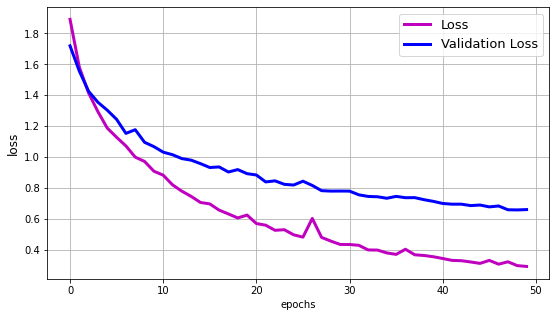

In [77]:
plt.figure(figsize=(9,5))

plt.plot(cnnhistory.history['loss'], 'm', linewidth=3)
plt.plot(cnnhistory.history['val_loss'], 'b', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

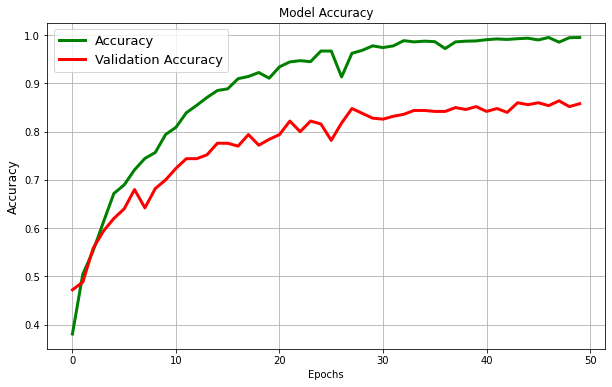

In [78]:
plt.figure(figsize=(10,6), frameon=True)

plt.plot(cnnhistory.history['accuracy'], 'g', linewidth=3)
plt.plot(cnnhistory.history['val_accuracy'], 'r', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)

plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

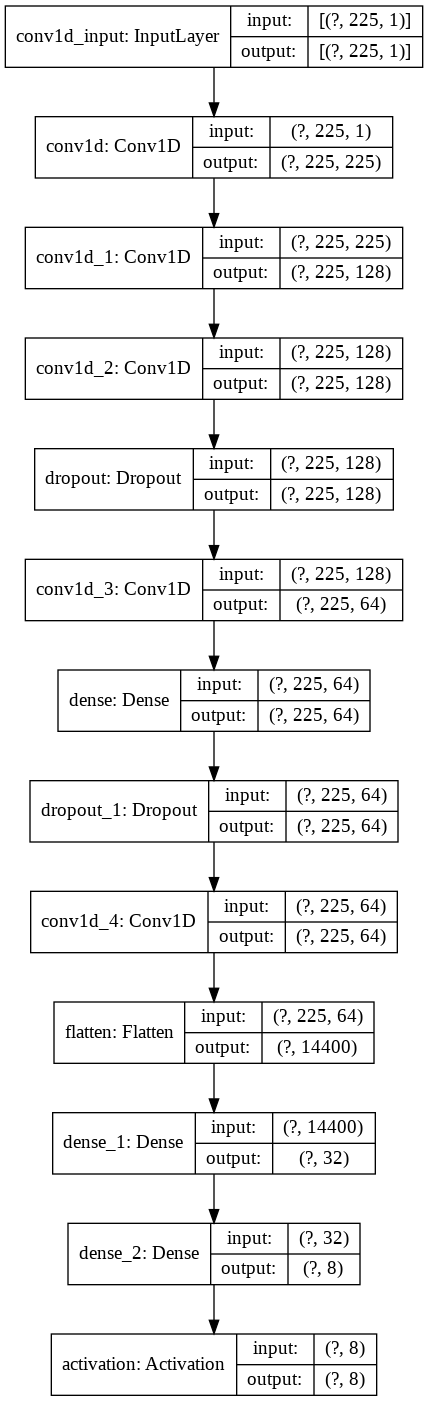

In [79]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = '/content/drive/My Drive/My_AI/img_model_MALE_8features_normalized_regularized_new_order.png'
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)


# **SAVING THE MODEL**

In [80]:
model_name = 'Emotion_Voice_Detection_CNN_model_17_MALE_8features_normalized_tanh_regularized-new_order.h5'
path = '/content/drive/My Drive/My_AI/MY MODELS/'
model_path = os.path.join(path, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/My_AI/MY MODELS/Emotion_Voice_Detection_CNN_model_17_MALE_8features_normalized_tanh_regularized-new_order.h5 


In [81]:
import json
model_json = model.to_json()
with open("/content/drive/My Drive/My_AI/MY MODELS/model_17_MALE_8features_normalized_tanh_regularized-new_order.json", "w") as json_file:
    json_file.write(model_json)

# **LOADING THE MODEL**

In [82]:
import tensorflow as tf
from keras.models import model_from_json
json_file = open('/content/drive/My Drive/My_AI/MY MODELS/model_17_MALE_8features_normalized_tanh_regularized-new_order.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/My_AI/MY MODELS/Emotion_Voice_Detection_CNN_model_17_MALE_8features_normalized_tanh_regularized-new_order.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
opt = tf.keras.optimizers.Adam(learning_rate=0.0001) ###
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 85.80%


# **Predicting emotions on the test data**


In [83]:
import pandas as pd

preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
preds1=preds.argmax(axis=1)

abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})

actual=y_test.argmax(axis=1)

abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

actualdf = pd.DataFrame({'actualvalues': actualvalues})
finaldf = actualdf.join(preddf)

finaldf[10:70]


16/16 [==============================] - 1s 77ms/step


,actualvalues,predictedvalues
10,male_joy,male_joy
11,male_sadness,male_sadness
12,male_fear,male_fear
13,male_joy,male_joy
14,male_joy,male_joy
15,male_anger,male_anger
16,male_sadness,male_sadness
17,male_anger,male_anger
18,male_sadness,male_sadness
19,male_fear,male_fear


In [84]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
male_anger,77
male_calm,17
male_disgust,58
male_fear,66
male_joy,87
male_neutral,60
male_sadness,65
male_surprise,70


In [85]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
male_anger,79
male_calm,14
male_disgust,53
male_fear,63
male_joy,104
male_neutral,58
male_sadness,64
male_surprise,65


In [86]:
finaldf.to_csv('Predictions_17_MALE_8features_.csv', index=False)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))


               precision    recall  f1-score   support

   male_anger       0.89      0.91      0.90        77
    male_calm       0.86      0.71      0.77        17
 male_disgust       0.89      0.81      0.85        58
    male_fear       0.78      0.74      0.76        66
     male_joy       0.77      0.92      0.84        87
 male_neutral       0.93      0.90      0.92        60
 male_sadness       0.89      0.88      0.88        65
male_surprise       0.92      0.86      0.89        70

     accuracy                           0.86       500
    macro avg       0.87      0.84      0.85       500
 weighted avg       0.86      0.86      0.86       500



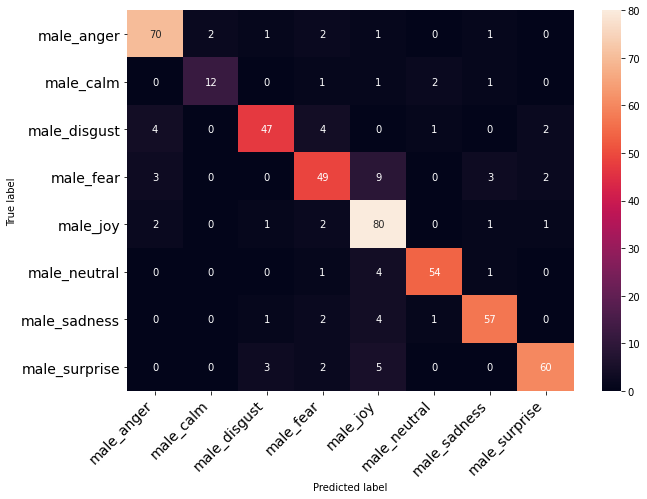

In [88]:
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'male_disgust' or 'male_fear' or 'male_joy' or 'male_sadness' or 'male_surprise' or 'male_neutral' or 'male_anger' or 'male_calm':
        return 'male'

finaldf = pd.read_csv('Predictions_17_MALE_8features_.csv')
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
#print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

# RECORD AUDIO 

In [47]:
!pip install SpeechRecognition
!pip install pyttsx3
!pip install ffmpeg-python
!sudo apt-get install portaudio19-dev python-pyaudio python3-pyaudio

     |████████████████████████████████| 32.8MB 111kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc python-pyaudio-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev python-pyaudio
  python3-pyaudio
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,108 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pyaudio amd64 0.2.11-1build2 [24.1 kB]


In [48]:
"""
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin = True, pipe_stdout = True, pipe_stderr = True, quiet = True, overwrite_output = True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [49]:
audio_index = 1

In [50]:
#audio, sr = get_audio()

In [51]:
type(audio)

NameError: ignored

In [ ]:
from scipy.io.wavfile import write

samplerate = 44100; fs = 100
#t = np.linspace(0., 1., samplerate)
#amplitude = np.iinfo(np.int16).max
#data = amplitude * np.sin(2. * np.pi * fs * t)

audio_path = '/content/record_' + str(audio_index)
write(audio_path, samplerate, audio)
audio_index += 1

# **VOICE TEST**

In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/My_AI/Real Voice samples/recording_demo_5')

% pylab inline
import os
import pandas as pd
import librosa
import glob 
from librosa import display

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
X, sample_rate = librosa.load('/content/drive/My Drive/My_AI/Real Voice samples/recording_demo_5', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)

demo_file = os.fspath('/content/drive/My Drive/My_AI/Real Voice samples/recording_demo_5')
features_live  = extract_feature(demo_file, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)

In [ ]:
features_live = pd.DataFrame(data = features_live)
features_live = features_live.stack().to_frame().T

# **EMOTIONS**

In [ ]:
import torch
features_live_2d = np.expand_dims(features_live, axis=2)
live_preds = loaded_model.predict(features_live_2d, batch_size=32, verbose = 1)
#print(live_preds)


all = np.argsort(-live_preds, axis=1)[:, :8]
for i in all:
  print((lb.inverse_transform((i))))
 
 

print()
print()
best_n = np.argsort(-live_preds)[:, :3] # best_n = [* * *]

first_second = 0
second_third = 0

for n in best_n:
  k = n
  num = 1
  for k in n:   
    #print(live_preds[0][n])
    #print(k)
    #print(n)
    if num == 1: first_second = live_preds[0][k] / live_preds[0][n][1]  
    elif num == 2: second_third = live_preds[0][k] / live_preds[0][n][2]
    num += 1


for i in best_n:
  print((lb.inverse_transform((i))))



In [ ]:
for i in best_n:
  first_emo = lb.inverse_transform((i))[0][5:]
  second_emo = lb.inverse_transform((i))[1][5:]
  third_emo = lb.inverse_transform((i))[2][5:]

emotion = ''
intensity_emo = ''
mixed_emo = ''

if first_second >= 10000:
  emotion = first_emo

elif first_second >= 200:
  #mix intensity
  if first_emo == 'disgust' and second_emo == 'anger': intensity_emo = 'distant' 
  elif first_emo == 'anger' and second_emo == 'disgust': intensity_emo = 'irritation'  
  elif first_emo == 'disgust' and second_emo == 'sadness': intensity_emo = 'guilt'
  elif first_emo == 'sadness' and second_emo == 'disgust': intensity_emo = 'miserable'
  elif first_emo == 'sadness' and second_emo == 'fear': intensity_emo = 'anxious'
  elif first_emo == 'fear' and second_emo == 'sadness': intensity_emo = 'desperate'
  elif first_emo == 'fear' and second_emo == 'joy': intensity_emo = 'astonished'
  elif first_emo == 'joy' and second_emo == 'fear': intensity_emo = 'determined'
  #elif first_emo == '' and second_emo == '': intensity_emo = ''
  #elif first_emo == '' and second_emo == '': intensity_emo = ''

#elif second_third >= 100:
  #mix intensity

if first_second < 200: # in this case the first and second emos are close to equal 
  # mix
  if first_emo == 'disgust' or second_emo == 'disgust':
    if first_emo == 'sadness' or second_emo == 'sadness': emotion = 'remorse'
    elif first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral disgust'
    elif first_emo == 'anger' or second_emo == 'anger': emotion = 'contempt'
    elif first_emo == 'fear' or second_emo == 'fear': emotion = 'shame'
    elif first_emo == 'joy' or second_emo == 'joy': emotion = 'morbidness'
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'unbelief'

  elif first_emo == 'fear' or second_emo == 'fear':
    if first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral fear'
    elif first_emo == 'joy' or second_emo == 'joy': emotion = 'guilt'         #????
    elif first_emo == 'sadness' or second_emo == 'sadness': emotion = 'despair'
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'awe'
  
  elif first_emo == 'anger' or second_emo == 'anger':
    if first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral anger'
    elif first_emo == 'joy' or second_emo == 'joy': emotion = 'pride' 
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'outrage'   

  elif first_emo == 'joy' or second_emo == 'joy':
    if first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral joy'  
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'delight' 

  elif first_emo == 'sadness' or second_emo == 'sadness':
    if first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral sadness'  
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'disappointment' 
    elif first_emo == 'anger' or second_emo == 'anger': emotion = 'envy'

else: emotion = first_emo

if second_third < 200:    # in this case the second and third emos are close to equal 
 # mix
  if third_emo == 'disgust' or second_emo == 'disgust':
    if third_emo == 'sadness' or second_emo == 'sadness': mixed_emo = 'remorse'
    elif third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral disgust'
    elif third_emo == 'anger' or second_emo == 'anger': mixed_emo = 'contempt'
    elif third_emo == 'fear' or second_emo == 'fear': mixed_emo = 'shame'
    elif third_emo == 'joy' or second_emo == 'joy': mixed_emo = 'morbidness'
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'unbelief'

  elif third_emo == 'fear' or second_emo == 'fear':
    if third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral fear'
    elif third_emo == 'joy' or second_emo == 'joy': mixed_emo = 'guilt'         #????
    elif third_emo == 'sadness' or second_emo == 'sadness': mixed_emo = 'despair'
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'awe'
  
  elif third_emo == 'anger' or second_emo == 'anger':
    if third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral anger'
    elif third_emo == 'joy' or second_emo == 'joy': mixed_emo = 'pride' 
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'outrage'   

  elif third_emo == 'joy' or second_emo == 'joy':
    if third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral joy'  
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'delight' 

  elif third_emo == 'sadness' or second_emo == 'sadness':
    if third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral sadness'  
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'disappointment' 
    elif third_emo == 'anger' or second_emo == 'anger': mixed_emo = 'envy'


print(first_emo)
print('Main emotion:')
print(emotion)
print('Mixed emotion:')
print(mixed_emo)
print('Emotion by intensity:')
print(intensity_emo)